<a href="https://colab.research.google.com/github/SomaPrasadSahoo/RiceImage/blob/main/Riceimage_Vanilla_CNN_MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Computer Vision Using Vanilla CNN and MobileNetV2**

In [10]:
pip install opencv-python

In [2]:
pip install split-folders                  #Used for splitting the training, test, Validation set while preserving the folder structure

In [3]:
pip install opendatasets

Source code from Kaggle: https://www.kaggle.com/code/avulaniharika/rice-image-classification-using-cnn

## **Import Packages**

In [11]:
import matplotlib.pyplot as plt
import opendatasets as od
import seaborn as sns
import numpy as np
import pandas as pd
import random
import cv2
import os
import PIL
import pathlib
import splitfolders


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

Dataset Loading and Splitting

In [13]:
import opendatasets as od

# Replace with the actual Kaggle dataset URL
dataset_url = "https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset/data"

# Download and extract dataset
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Soma Prasad Sahoo
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset


100%|██████████| 219M/219M [00:01<00:00, 187MB/s]


In [16]:
base_ds= '/content/rice-image-dataset/Rice_Image_Dataset'
base_ds = pathlib.Path(base_ds)

In [17]:
# Check if the dataset contains the subfolders (rice types)
print("Subfolders in the dataset:")
for folder in base_ds.iterdir():
    print(folder.name)

Subfolders in the dataset:
Karacadag
Ipsala
Rice_Citation_Request.txt
Arborio
Jasmine
Basmati


In [18]:
print("Subfolders in the dataset:")
for folder in base_ds.iterdir():
    if folder.is_dir():  # Ensure only directories are listed
        print(folder.name)

Subfolders in the dataset:
Karacadag
Ipsala
Arborio
Jasmine
Basmati


In [19]:
splitfolders.ratio(base_ds, output='imgs',seed=123,ratio=(.7,.15,.15),group_prefix=None)

Copying files: 75000 files [00:08, 8376.35 files/s]


In [20]:
import os
print('Train folder contents')
for folder in os.listdir('imgs/train'):
    print(f'{folder}: {len(os.listdir("imgs/train/" + folder))}')
for folder in os.listdir('imgs/val'):
    print(f'{folder}: {len(os.listdir("imgs/val/" + folder))}')
for folder in os.listdir('imgs/test'):
    print(f'{folder}: {len(os.listdir("imgs/test/" + folder))}')

Train folder contents
Karacadag: 10500
Ipsala: 10500
Arborio: 10500
Jasmine: 10500
Basmati: 10500
Karacadag: 2250
Ipsala: 2250
Arborio: 2250
Jasmine: 2250
Basmati: 2250
Karacadag: 2250
Ipsala: 2250
Arborio: 2250
Jasmine: 2250
Basmati: 2250


In [21]:
arborio = [fn for fn in os.listdir(f'{base_ds}/Arborio') if fn.endswith('.jpg')]
basmati = [fn for fn in os.listdir(f'{base_ds}/Basmati') if fn.endswith('.jpg')]
ipsala = [fn for fn in os.listdir(f'{base_ds}/Ipsala') if fn.endswith('.jpg')]
jasmine = [fn for fn in os.listdir(f'{base_ds}/Jasmine') if fn.endswith('.jpg')]
karacadag = [fn for fn in os.listdir(f'{base_ds}/Karacadag') if fn.endswith('.jpg')]
rice = [arborio, basmati, ipsala, jasmine, karacadag]
rice_classes = []
for i in os.listdir('imgs/train'):
    rice_classes+=[i]
rice_classes.sort()

## **Dataset Exploration**

Total images: 75000
Total number of classes: 5
Total Arborio images: 15000
Total Basmati images: 15000
Total Ipsala images: 15000
Total Jasmine images: 15000
Total Karacadag images: 15000


<ipython-input-22-fb5c2fba640c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rice_classes, y=rice_count, palette="Blues_d")


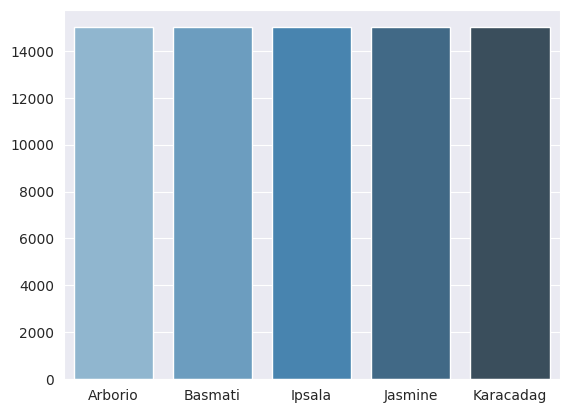

In [22]:
image_count=len(list(base_ds.glob('*/*.jpg')))
print(f'Total images: {image_count}')
print(f'Total number of classes: {len(rice_classes)}')
count = 0
rice_count = []
for x in rice_classes:
  print(f'Total {x} images: {len(rice[count])}')
  rice_count.append(len(rice[count]))
  count += 1

sns.set_style('darkgrid')
sns.barplot(x=rice_classes, y=rice_count, palette="Blues_d")
plt.show()

Total images in train set: 52500
Total number of classes: 5
Total Arborio images: 10500
Total Basmati images: 10500
Total Ipsala images: 10500
Total Jasmine images: 10500
Total Karacadag images: 10500


<ipython-input-23-6f258a31c96f>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rice_classes, y=rice_count, palette="Blues_d")


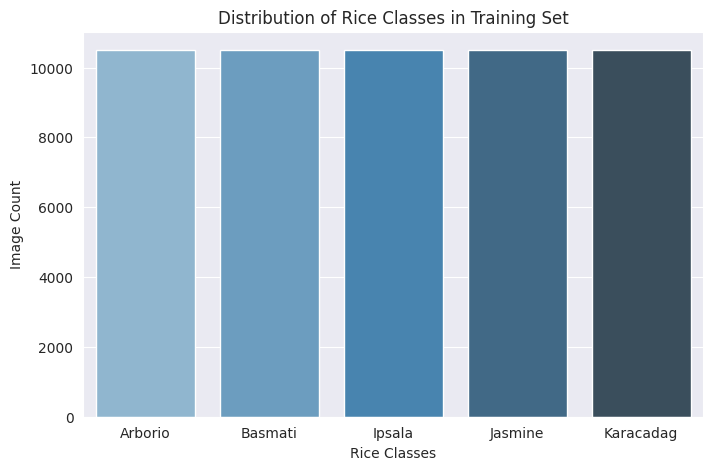

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Count total images from split dataset
train_dir = "imgs/train"
image_count = sum(len(files) for _, _, files in os.walk(train_dir))

# Get class names and counts dynamically
rice_classes = sorted(os.listdir(train_dir))
rice_count = [len(os.listdir(os.path.join(train_dir, cls))) for cls in rice_classes]

print(f'Total images in train set: {image_count}')
print(f'Total number of classes: {len(rice_classes)}')

# Print per-class counts
for cls, count in zip(rice_classes, rice_count):
    print(f'Total {cls} images: {count}')

# Plot class distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.barplot(x=rice_classes, y=rice_count, palette="Blues_d")
plt.xlabel("Rice Classes")
plt.ylabel("Image Count")
plt.title("Distribution of Rice Classes in Training Set")
plt.show()

Sample image

Image dimensions: (250, 250, 3)


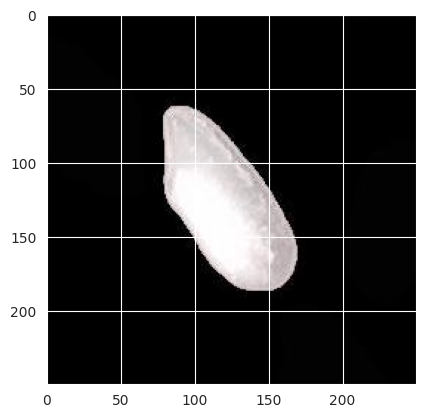

In [24]:
sample_img = cv2.imread('imgs/test/Arborio/Arborio (10).jpg')
plt.imshow(sample_img)
print(f'Image dimensions: {sample_img.shape}')

In [25]:
def load_random_img(dir, label):
  plt.figure(figsize=(10,10))
  i=0
  for label in rice_classes:
    i+=1
    plt.subplot(1, 5, i)
    file = random.choice(os.listdir(f'{dir}/{label}'))
    image_path = os.path.join(f'{dir}/{label}', file)
    img=cv2.imread(image_path)
    plt.title(label)
    plt.imshow(img)
    plt.grid(None)
    plt.axis('off')

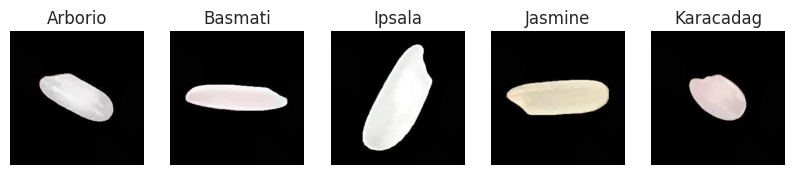

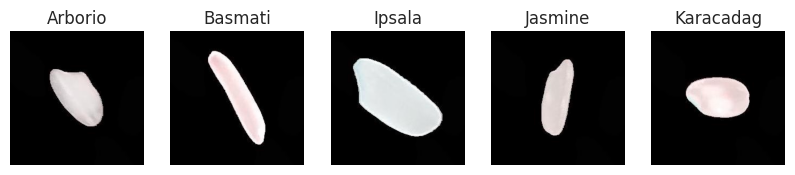

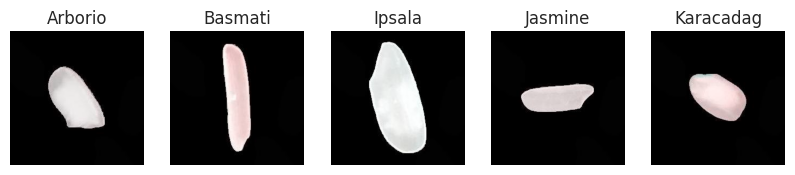

In [26]:
for i in range(3):
  load_random_img(base_ds, rice_classes)

In [27]:
batch_size = 256
img_height, img_width = 175, 175
input_shape = (img_height, img_width, 3)

## **Data Preprocessing**

In [28]:
datagen = ImageDataGenerator(rescale=1./255)

In [29]:
train_ds = datagen.flow_from_directory(
    'imgs/train',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    subset = "training",
    class_mode='categorical')

val_ds = datagen.flow_from_directory(
    'imgs/val',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

test_ds = datagen.flow_from_directory(
    'imgs/test',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

Found 52500 images belonging to 5 classes.
Found 11250 images belonging to 5 classes.
Found 11250 images belonging to 5 classes.


### **Vanilla CNN**

In [30]:
# Ensure TensorFlow uses GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Set memory growth to avoid full allocation
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU is available and being used!")
    except RuntimeError as e:
        print(e)

In [31]:
model_vanilla= tf.keras.Sequential([
    #First convolution Block (Fewer Filters)
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'),

    #Second convolution Block
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'),

    #Fully connected Layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model_vanilla.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_vanilla.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 173, 173, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 87, 87, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 85, 85, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 59168)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       3,786,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,792,229 (14.47 MB)

 Trainable params: 3,792,229 (14.47 MB)

 Non-trainable params: 0 (0.00 B)

## **Callbacks**

In [36]:
model_dir='saved_model'
if os.path.exists(model_dir):
  os.makedirs(model_dir)
checkpoint= ModelCheckpoint(filepath='saved_models/model_vanilla.keras',
                               monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping= EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=2)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',mode='min',verbose=1,patience=2,factor=0.5)
checkpointer=ModelCheckpoint(filepath='saved_models/model_vanilla.keras',monitor='val_accuracy',verbose=1,save_best_only=True,save_freq='epoch')
callbacks=[early_stopping, reduce_lr, checkpointer]

In [37]:
history1 = model_vanilla.fit(
    train_ds,                # Training data
    epochs=2,                # Number of epochs to train for (3 epochs)
    validation_data=val_ds,  # Validation data for model evaluation during training
    callbacks=callbacks      # List of callbacks to apply during training
)

Epoch 1/2
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8577 - loss: 0.3695

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.98587, saving model to saved_models/model_vanilla.keras
206/206 ━━━━━━━━━━━━━━━━━━━━ 1055s 5s/step - accuracy: 0.8580 - loss: 0.3685 - val_accuracy: 0.9859 - val_loss: 0.0427 - learning_rate: 0.0010
Epoch 2/2
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9794 - loss: 0.0638
Epoch 2: val_accuracy improved from 0.98587 to 0.98800, saving model to saved_models/model_vanilla.keras
206/206 ━━━━━━━━━━━━━━━━━━━━ 1056s 5s/step - accuracy: 0.9794 - loss: 0.0638 - val_accuracy: 0.9880 - val_loss: 0.0364 - learning_rate: 0.0010


In [38]:
import os
print(os.path.exists('saved_models/model_vanilla.keras'))  # Should return True

True


In [39]:
from tensorflow.keras.models import load_model

# Load the best saved model
model_vanilla = load_model('saved_models/model_vanilla.keras')

Model Evaluation of Vanilla CNN

In [40]:
score1 = model_vanilla.evaluate(test_ds, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9894 - loss: 0.0355


In [41]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model_vanilla.predict(test_ds)

44/44 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step


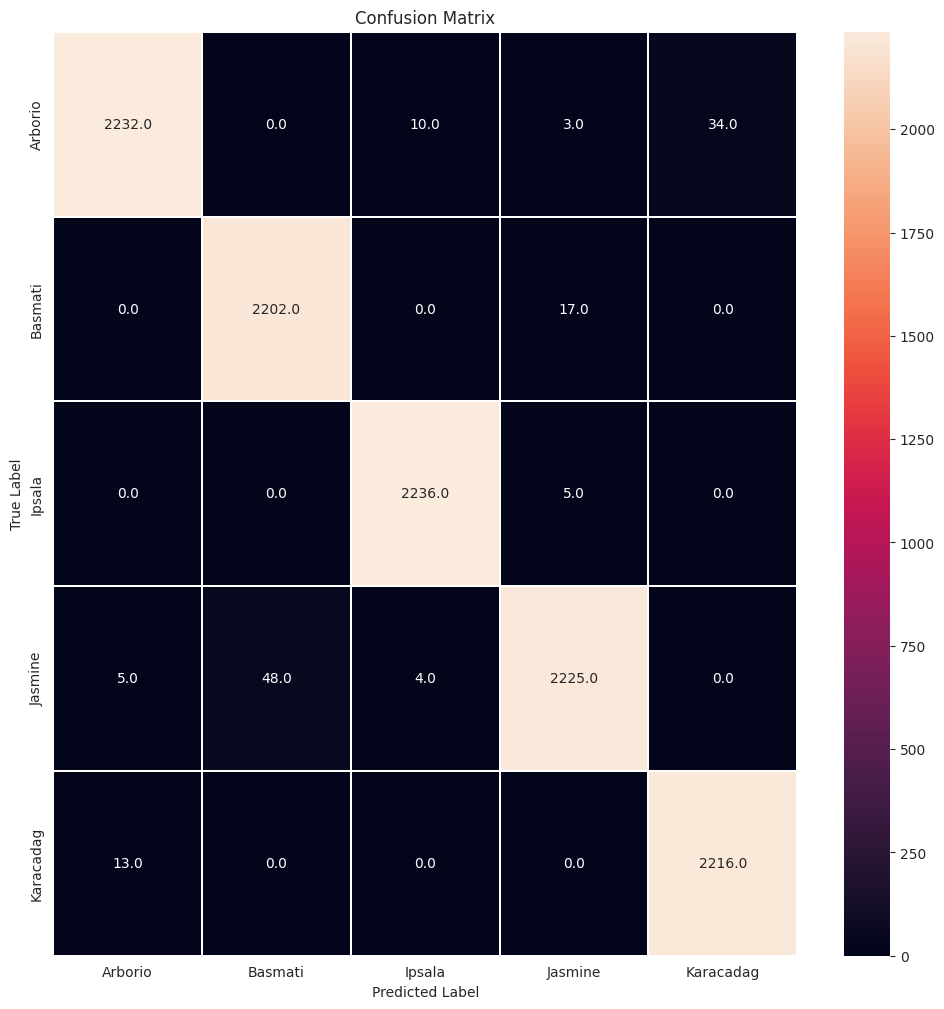

In [42]:
y_pred = np.argmax(Y_pred, axis=1)
confusion_mtx = confusion_matrix(y_pred, test_ds.classes)
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True,
            linewidths=0.01,
            linecolor="white",
            fmt= '.1f',ax=ax,)
sns.color_palette("rocket", as_cmap=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(test_ds.class_indices)
ax.yaxis.set_ticklabels(rice_classes)
plt.title("Confusion Matrix")
plt.show()

In [43]:
report1 = classification_report(test_ds.classes, y_pred, target_names=rice_classes, output_dict=True)
df1 = pd.DataFrame(report1).transpose()
df1

,precision,recall,f1-score,support
Arborio,0.979377,0.992000,0.985648,2250.000000
Basmati,0.992339,0.978667,0.985455,2250.000000
Ipsala,0.997769,0.993778,0.995769,2250.000000
Jasmine,0.975022,0.988889,0.981906,2250.000000
Karacadag,0.994168,0.984889,0.989507,2250.000000
accuracy,0.987644,0.987644,0.987644,0.987644
macro avg,0.987735,0.987644,0.987657,11250.000000
weighted avg,0.987735,0.987644,0.987657,11250.000000


## **Transfer Learning with MobileNetV2**

In [44]:
import tensorflow as tf
tpus= tf.config.experimental.list_physical_devices('TPU')
if tpus:
  try:
    for tpu in tpus:
      tf.config.experimental.set_memory_growth(tpu, True)
      print("TPUs are currently being used")
  except RuntimeError as e:
    print(e)

In [45]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

In [50]:
from tensorflow.keras.applications import MobileNetV2
mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
mobilenet.trainable= False

inputs=tf.keras.Input(input_shape)
x= mobilenet(inputs, training=False)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(512,activation='relu')(x)
x=tf.keras.layers.Dropout(0.3)(x)
x=tf.keras.layers.Dense(5,activation='softmax')(x)
model_mobilenet=tf.keras.Model(inputs,x)


<ipython-input-50-6031ff0267c4>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)


In [51]:
# Compile the model
model_mobilenet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

model_mobilenet.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 175, 175, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 6, 6, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,916,421 (11.13 MB)

 Trainable params: 658,437 (2.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [52]:
# Save the best model during training
checkpointer = ModelCheckpoint(filepath='saved_models/model_mobilenet.keras',
                               monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True, save_freq='epoch')

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4, min_delta=0.001)

# Reduce learning rate on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# List of callbacks to use
callbacks = [early_stopping, reduce_lr, checkpointer]

In [ ]:
history2 = model_mobilenet.fit(train_ds, epochs=1, validation_data=val_ds, callbacks=callbacks)

 84/206 ━━━━━━━━━━━━━━━━━━━━ 50:09 25s/step - accuracy: 0.7602 - loss: 0.8091

In [ ]:
#Load the best saved model
model_mobilenet.load_weights('saved_models/model_mobilenet.keras')

Model Evaluation for MobileNet

In [ ]:
score2 = model_mobilenet.evaluate(test_ds, verbose=1)
print(f'Model 1 Vanilla Loss: {score1[0]}, Accuracy: {score1[1]*100}')
print(f'Model 2 MobileNetV2 Loss: {score2[0]}, Accuracy: {score2[1]*100}')

In [ ]:
Y_pred = model_mobilenet.predict(test_ds)
y_pred = np.argmax(Y_pred, axis=1)

confusion_mtx = confusion_matrix(y_pred, test_ds.classes)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True,
            linewidths=0.01,
            linecolor="white",
            fmt='.1f', ax=ax)
sns.color_palette("rocket", as_cmap=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(test_ds.class_indices)
ax.yaxis.set_ticklabels(rice_classes)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
report2 = classification_report(test_ds.classes, y_pred, target_names=rice_classes, output_dict=True)
df2 = pd.DataFrame(report2).transpose()
print(df2)